## Imports

In [1]:
import sys
import numpy as np
import pandas as pd
from os.path import abspath, join as opj
from scipy.spatial.distance import cdist

sys.path.insert(0, abspath('../helpers/'))
from participant import Participant
from experiment import Experiment

import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import seaborn as sns
%matplotlib inline

## Set paths & params

In [2]:
fig_dir = '../../paper/figs/'

plt.rcParams['pdf.fonttype'] = 42
sns.set_context('paper')
cmap = 'rocket'

## Load data

In [3]:
exp = Experiment()
forces_lecture, bos_lecture = exp.load_lecture_trajs()
exp.load_question_vectors()
forces_qs = exp.get_question_vecs(lectures='forces')
bos_qs = exp.get_question_vecs(lectures='bos')
forces_text, bos_text = exp.load_transcript(('forces', 'bos'), splitlines=True)
question_text = exp.load_questions()

## Lecture & question content timeseries fig

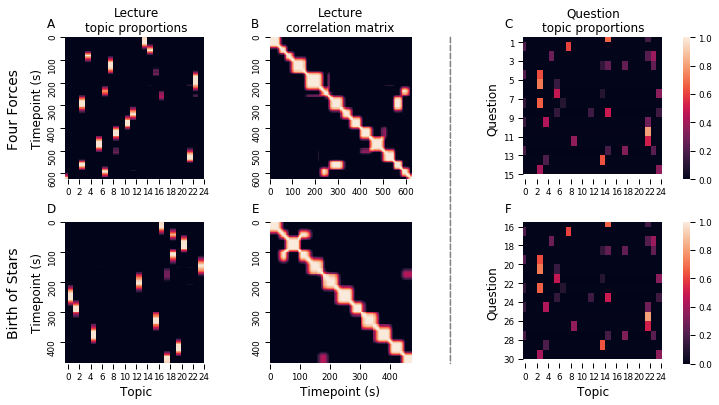

In [4]:
gridspec_kws = {
    'wspace': 0.1, 
    'hspace': 0.3, 
    'width_ratios': (1, 1, .3, 1)
}
cbar_kws = {'pad': 0.1}

fig, axarr = plt.subplots(2, 4, gridspec_kw=gridspec_kws)
fig.set_size_inches(12, 6)
(
    (a, b, sep1, c), 
    (d, e, sep2, f)
) = axarr

# ======== Four Forces ========
# lecture topic proportions by timepoint
sns.heatmap(forces_lecture, vmin=0, vmax=1, xticklabels=2, yticklabels=100, 
            cbar=False, cmap=cmap, ax=a)
a.collections[0].remove()
aspect = forces_lecture.shape[1] / forces_lecture.shape[0]
a.imshow(forces_lecture, aspect=aspect, vmin=0, vmax=1, cmap=cmap)
a.set_title('Lecture\ntopic proportions', fontsize=12)
a.set_ylabel('Timepoint (s)', fontsize=12)
a.annotate('Four Forces', xy=(-.75, .5), xycoords=a.yaxis.label, 
           size='x-large', rotation=90, ha='right', va='center')

# lecture timepoints x timepoints correlation matrix
corrmat = np.corrcoef(forces_lecture)
sns.heatmap(corrmat, vmin=0, vmax=1, xticklabels=100, yticklabels=100, 
            cbar=False, cmap=cmap, ax=b)
b.collections[0].remove()
b.imshow(corrmat, aspect='equal', vmin=0, vmax=1, cmap=cmap)
b.set_title('Lecture\ncorrelation matrix', fontsize=12)

# question topic proportions
sns.heatmap(forces_qs, vmin=0, vmax=1, xticklabels=2, yticklabels=2, 
            cmap=cmap, cbar=True, cbar_kws=cbar_kws, ax=c)
c.collections[0].remove()
aspect = forces_qs.shape[1] / forces_qs.shape[0]
c.imshow(forces_qs, aspect=aspect, vmin=0, vmax=1, cmap=cmap)
c.set_yticklabels(list(range(1, 16, 2)), rotation=0)
c.set_title('Question\ntopic proportions', fontsize=12)
c.set_ylabel('Question', fontsize=12)

# ======== Birth of Stars ========
# lecture topic proportions by timepoint
sns.heatmap(bos_lecture, vmin=0, vmax=1, xticklabels=2, yticklabels=100, 
            cbar=False, cmap=cmap, ax=d)
d.collections[0].remove()
aspect = bos_lecture.shape[1] / bos_lecture.shape[0]
d.imshow(bos_lecture, aspect=aspect, vmin=0, vmax=1, cmap=cmap)
d.set_xlabel('Topic', fontsize=12)
d.set_ylabel('Timepoint (s)', fontsize=12)
d.annotate('Birth of Stars', xy=(-.75, .5), xycoords=d.yaxis.label, 
           size='x-large', rotation=90, ha='right', va='center')

# lecture timepoints x timepoints correlation matrix
corrmat = np.corrcoef(bos_lecture)
sns.heatmap(corrmat, vmin=0, vmax=1, xticklabels=100, yticklabels=100, 
            cbar=False, cmap=cmap, ax=e)
e.collections[0].remove()
e.imshow(corrmat, aspect='equal', vmin=0, vmax=1, cmap=cmap)
e.set_xlabel('Timepoint (s)', fontsize=12)

# question topic proportions
sns.heatmap(bos_qs, vmin=0, vmax=1, xticklabels=2, yticklabels=2, 
            cmap=cmap, cbar=True, cbar_kws=cbar_kws, ax=f)
f.collections[0].remove()
aspect = bos_qs.shape[1] / bos_qs.shape[0]
f.imshow(forces_qs, aspect=aspect, vmin=0, vmax=1, cmap=cmap)
f.set_yticklabels(list(range(16, 31, 2)), rotation=0)
f.set_xlabel('Topic', fontsize=12)
f.set_ylabel('Question', fontsize=12)

# separator line
xyA = (0, 1)
xyB = (0, 0)
vline = ConnectionPatch(xyA, xyB, coordsA='axes fraction', 
                        coordsB='axes fraction', axesA=sep1, axesB=sep2, 
                        linestyle='--', linewidth=1.5, color='grey')
sep2.add_artist(vline)
sep1.axis('off')
sep2.axis('off')

# panel labels
labels = 'ABCDEF'
for i, ax in enumerate((a, b, c, d, e, f)):
    ax.text(-.1, 1.07, labels[i], horizontalalignment='center', 
            transform=ax.transAxes, fontsize=12)
    
# plt.savefig(opj(fig_dir, 'content-timeseries.pdf'), dpi=1000)
plt.show()

## Lecture-question similarity timeseries fig

In [5]:
sns.set_context('talk')
# sns.set_palette('hls', 15)
sns.set_palette(sns.hls_palette(15, h=.3))

forces_qcorrs = 1 - cdist(forces_lecture, forces_qs, 'correlation')
bos_qcorrs = 1 - cdist(bos_lecture, bos_qs, 'correlation')

# choose some sample points to compare lecture & question content
forces_high = [115, 537]
forces_low = [252, 384]
bos_high = [167, 455]
bos_low = [102, 430]

In [6]:
# fig, axarr = plt.subplots(2, 1)
# fig.set_size_inches(14, 10)
# fax, bax = axarr

# # Four Forces
# fax.plot(forces_qcorrs)
# fax.set_title('Lecture-question content similarity')
# fax.set_xlim(0, forces_lecture.shape[0])
# fax.set_ylim(-.2, 1.05)
# fax.set_ylabel('Topic vector correlation')
# fax.legend(labels=[f'Q {i}' for i in range(1, 16)], fontsize='x-small', loc=5, 
#            bbox_to_anchor=(1.15, .5))
# fax.grid(False)
# fax.text(-.03, 1.03, 'A', horizontalalignment='center', transform=fax.transAxes)

# # Birth of Stars
# bax.plot(bos_qcorrs)
# bax.set_xlim(0, bos_lecture.shape[0])
# bax.set_ylim(-.2, 1.05)
# bax.set_xlabel('Lecture timepoint (s)')
# bax.set_ylabel('Topic vector correlation')
# bax.legend(labels=[f'Q {i}' for i in range(16, 31)], fontsize='x-small', loc=5, 
#            bbox_to_anchor=(1.15, .5))
# bax.grid(False)
# bax.text(-.03, 1.03, 'B', horizontalalignment='center', transform=bax.transAxes)

# plt.tight_layout()
# # plt.savefig(opj(fig_dir, 'lecture-question-similarity.pdf'))
# plt.show()

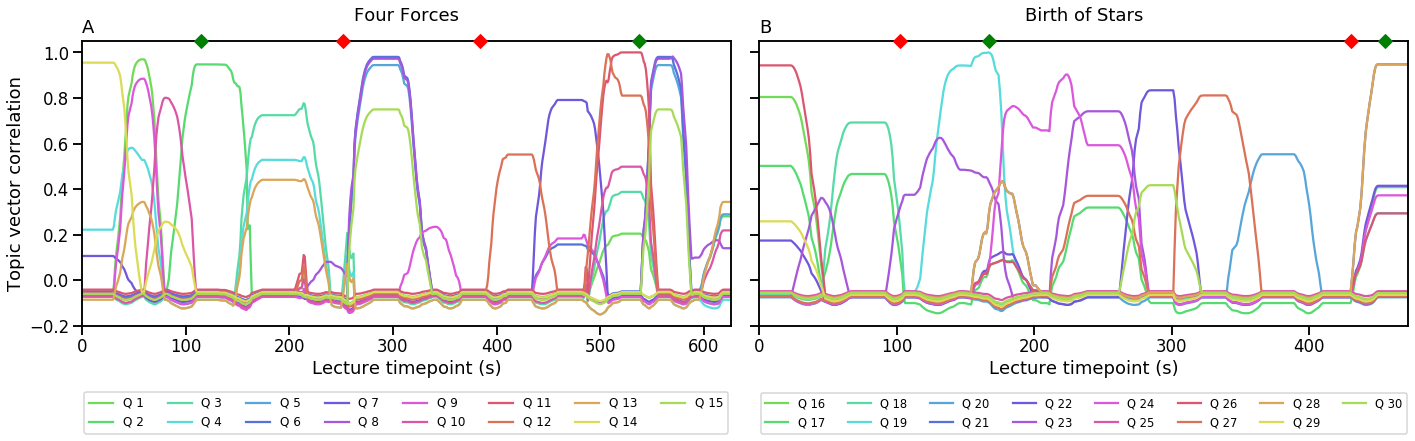

In [7]:
fig, axarr = plt.subplots(1, 2, sharey=True)
fig.set_size_inches(20, 7)
fax, bax = axarr

# Four Forces
fax.plot(forces_qcorrs)
fax.plot(forces_high, [1.05, 1.05], 'g', linestyle='', marker='D', 
         markersize=10, clip_on=False, zorder=10)
fax.plot(forces_low, [1.05, 1.05], 'r', linestyle='', marker='D', 
         markersize=10, clip_on=False, zorder=10)
fax.set_xlim(0, forces_lecture.shape[0])
fax.set_ylim(-.2, 1.05)
fax.set_xlabel('Lecture timepoint (s)')
fax.set_ylabel('Topic vector correlation')
fax.set_title('Four Forces', pad=20)
fax.legend(labels=[f'Q {i}' for i in range(1, 16)], fontsize=12, loc=8, 
           ncol=8, bbox_to_anchor=(.5, -.4))
fax.grid(False)
fax.text(0, 1.03, 'A', horizontalalignment='left', transform=fax.transAxes)

# Birth of Stars
bax.plot(bos_qcorrs)
bax.plot(bos_high, [1.05, 1.05], 'g', linestyle='', marker='D', 
         markersize=10, clip_on=False, zorder=10)
bax.plot(bos_low, [1.05, 1.05], 'r', linestyle='', marker='D', 
         markersize=10, clip_on=False, zorder=10)
bax.set_xlim(0, bos_lecture.shape[0])
bax.set_ylim(-.2, 1.05)
bax.set_xlabel('Lecture timepoint (s)')
bax.set_title('Birth of Stars', pad=20)
bax.legend(labels=[f'Q {i}' for i in range(16, 31)], fontsize=11.5, loc=8, 
           ncol=8, bbox_to_anchor=(.5, -.4))
bax.grid(False)
bax.text(0, 1.03, 'B', horizontalalignment='left', transform=bax.transAxes)

plt.subplots_adjust(wspace=-1)
plt.tight_layout()
# plt.savefig(opj(fig_dir, 'lecture-question-similarity.pdf'))
plt.show()

## Get lecture and question text for sample timepoints

In [8]:
for tpt in forces_high + forces_low:
    lecture_text = exp.get_timepoint_text('forces', tpt)
    print(f'Lecture text:\n\t{lecture_text}')
    top_q = np.argmax(forces_qcorrs[tpt]) + 1
    q_text = question_text.loc[top_q, 'question']
    print(f'Most similar question text:\n\tQ {top_q}:\t{q_text}\n')

Lecture text:
	minus and beta plus decay and just to give you an example of the actual weak interaction if I had some cesium 137 137 means it has 137 nucleons a nucleon is either a proton or a neutron you add up the protons and neutrons of cesium you get 137 and it is cesium because it has exactly 55 protons now the weak interaction is what's responsible for one of the neutrons
Most similar question text:
	Q 2:	Which of the following is an example of the Weak Interaction?

Lecture text:
	only applies over very very very small distances subatomic I should even say sub nucleic distances then the strong interaction comes into play so then you have the strong interaction actually keeping these charges together and once again just to keep it in in in mind relative to gravity it is 10 to the 38th 10 38 times the strength times the strength of gravity or it's about a hundred times stronger than the electromagnetic force so once again the
Most similar question text:
	Q 11:	Which force is stron

In [9]:
for tpt in bos_high + bos_low:
    lecture_text = exp.get_timepoint_text('bos', tpt)
    print(f'Lecture text:\n\t{lecture_text}')
    top_q = np.argmax(bos_qcorrs[tpt]) + 16
    q_text = question_text.loc[top_q, 'question']
    print(f'Most similar question text:\n\tQ {top_q}:\t{q_text}\n')

Lecture text:
	protons close enough to each other then all of a sudden the strong force will overtake it's much stronger than the Coulomb force and that these two hydrogen's will actually these this these nucleuses would actually fuse or that nuclei well anyway they would actually fuse together and so that is what actually happens once this gets hot and dense enough you now have enough pressure enough temperature to overcome the Coulomb force and bring these
Most similar question text:
	Q 19:	Which of the following can overcome the Coulomb Force?

Lecture text:
	where you get something like that so you have to reach a certain threshold or the mass where the pressure and the temperature due to the heavy mass gets so large that you start this fusion at but the smaller you have above that threshold this the slower the fusion will occur but if you're supermassive the fusion will occur really really fast so that's a general idea of just how stars get formed and why they don't collapse on th